In [1]:
import sys
sys.path.append('..')

In [2]:
from config_simulation import (
    algorithms,
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
)

SGD = algorithms.SGD
WASGD = algorithms.WASGD
SNARiccati = algorithms.SNARiccati
WASNARiccati = algorithms.WASNARiccati
USNA = algorithms.USNA
UWASNA = algorithms.UWASNA
SNA = algorithms.SNA
WASNA = algorithms.WASNA


N = 10
n = 10_000

optimizer_list = [
    WASGD(tau=0.0),  # ASGD
    WASGD(),
    SNARiccati(),
    WASNARiccati(),
    USNA(c_nu=5.0),
    USNA(c_nu=5.0, generate_Z="normal"),
    UWASNA(c_nu = 5.0),
    UWASNA(c_nu = 5.0, generate_Z="normal"),
]

import copy
optimizer_list_without_riccati = copy.deepcopy(optimizer_list)
optimizer_list_without_riccati[2] = SNA()
optimizer_list_without_riccati[3] = WASNA()

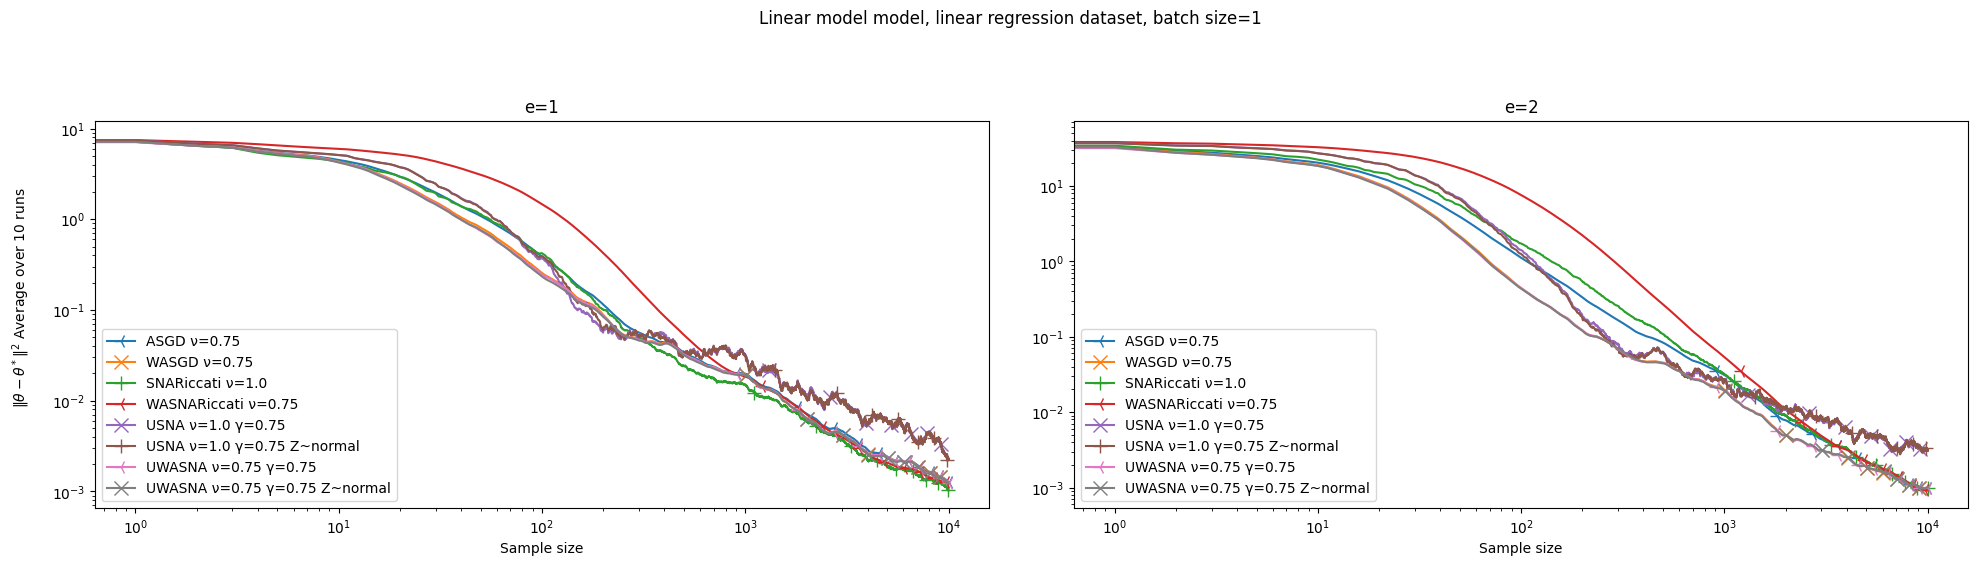

In [3]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

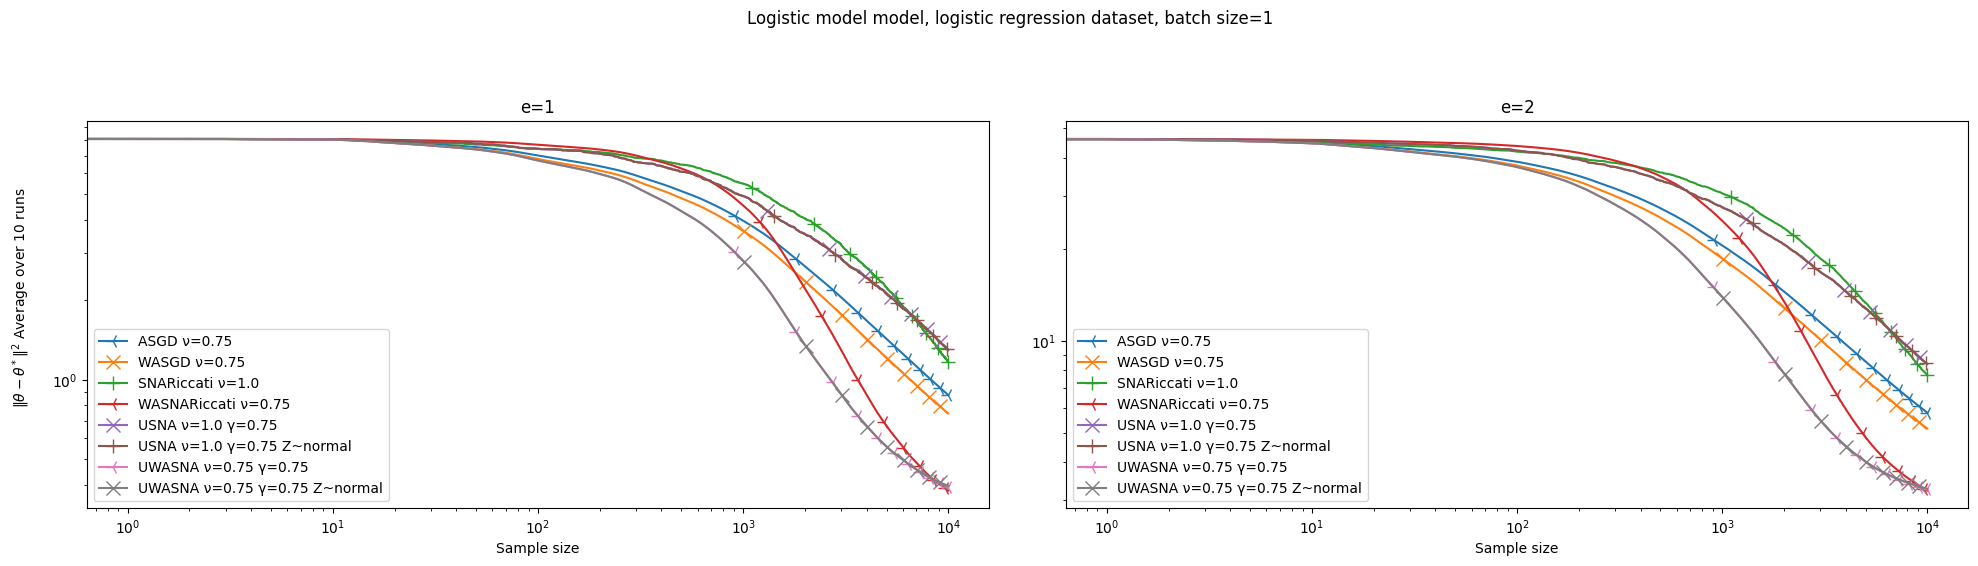

In [4]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

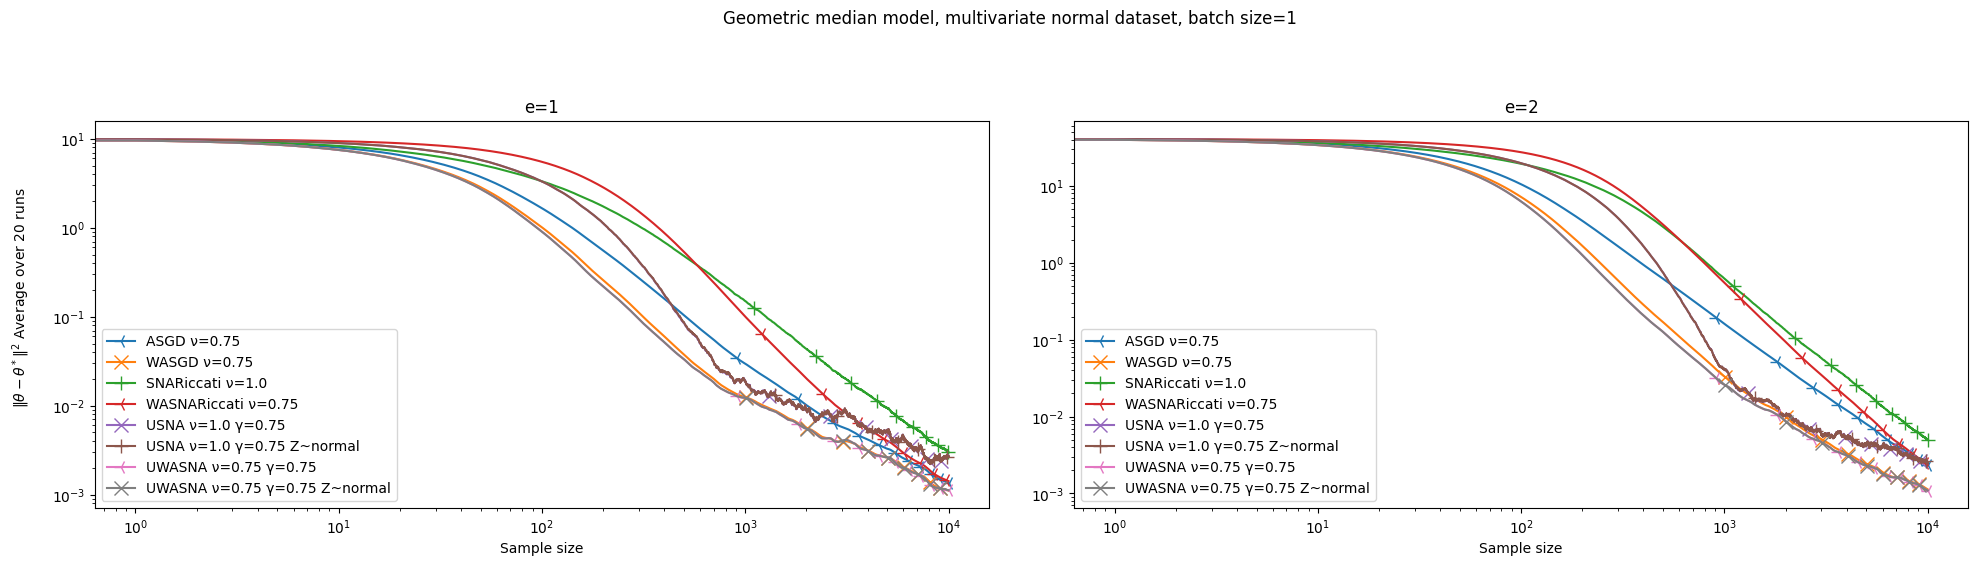

In [5]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=20, n=n)

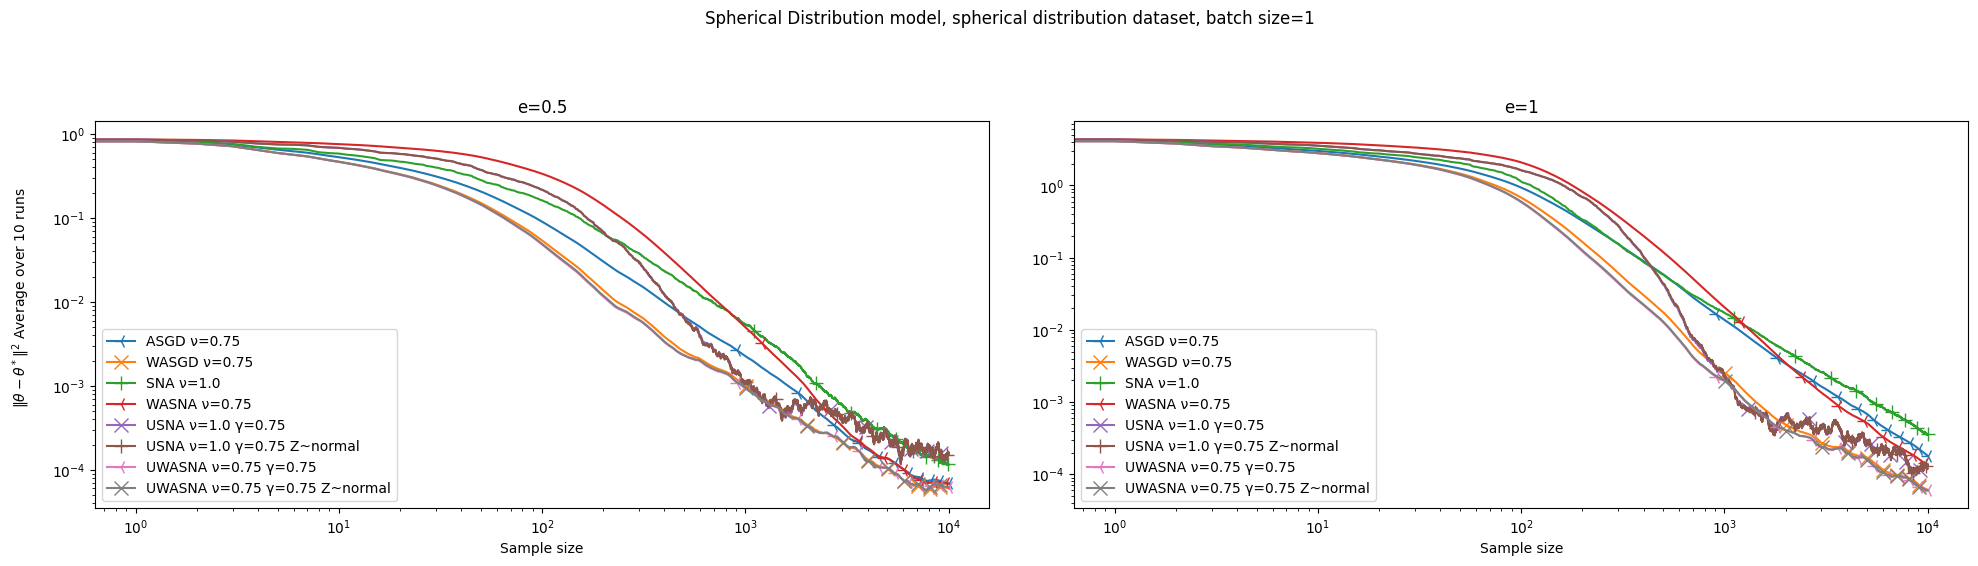

In [6]:
simulation = simulation_spherical_distribution(
    optimizer_list=optimizer_list_without_riccati
)
simulation.run_multiple_datasets(N=N, n=n)

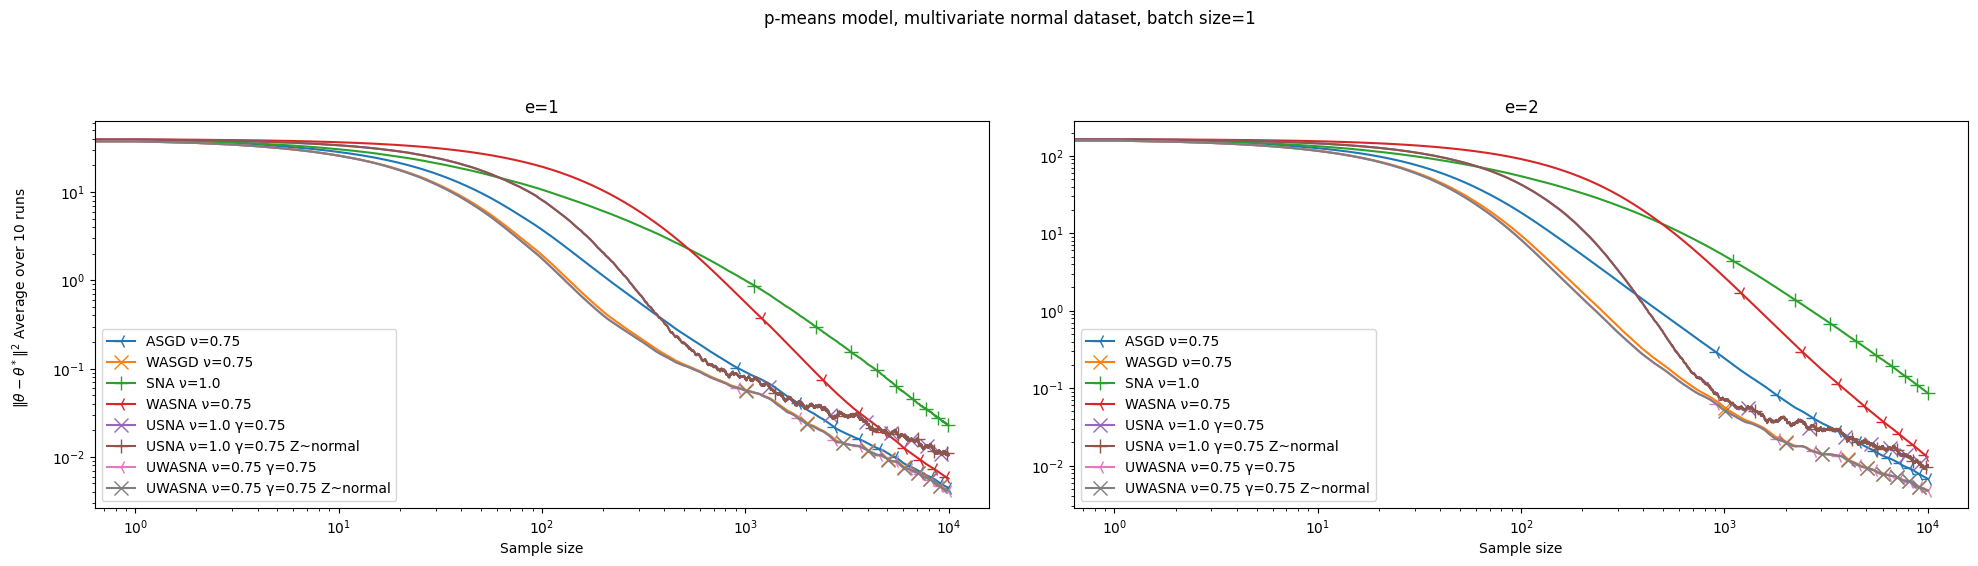

In [7]:
simulation = simulation_p_means(optimizer_list=optimizer_list_without_riccati)
simulation.run_multiple_datasets(N=N, n=n)

In [8]:
eval = eval_covtype(optimizer_list=optimizer_list)
_, _ = eval.run()

,ASGD ν=0.75,WASGD ν=0.75,SNARiccati ν=1.0,WASNARiccati ν=0.75,USNA ν=1.0 γ=0.75,USNA ν=1.0 γ=0.75 Z~normal,UWASNA ν=0.75 γ=0.75,UWASNA ν=0.75 γ=0.75 Z~normal
Training Accuracy,72.550000,72.900000,76.520000,70.560000,49.050000,55.910000,72.640000,72.690000
Test Accuracy,72.740000,73.170000,76.650000,70.540000,49.190000,56.060000,72.790000,72.830000
